In [13]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [6]:
# Read in the california housing data set
california_data = pd.read_csv('California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [8]:
# Get the information on the DataFrame
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


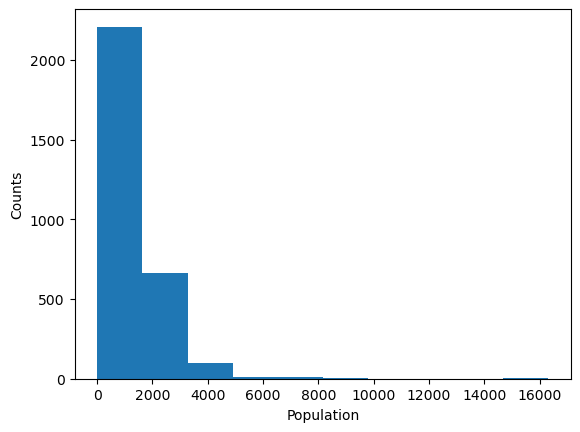

In [10]:
# Determine which measure of central tendency is most appropriate to describe the Population
plt.hist(california_data["Population"])
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()

In [17]:
#Compare the measures of central tendency
mean_pop = np.mean(california_data["Population"])
median_pop = np.median(california_data["Population"])
mode_pop = st.mode(california_data["Population"], keepdims=False)

print(f'The population mean: {round(mean_pop, 2)}')
print(f'The population median: {median_pop}')
print(f'The population mode: {int(mode_pop[0])}')

The population mean: 1387.96
The population median: 1152.5
The population mode: 1128


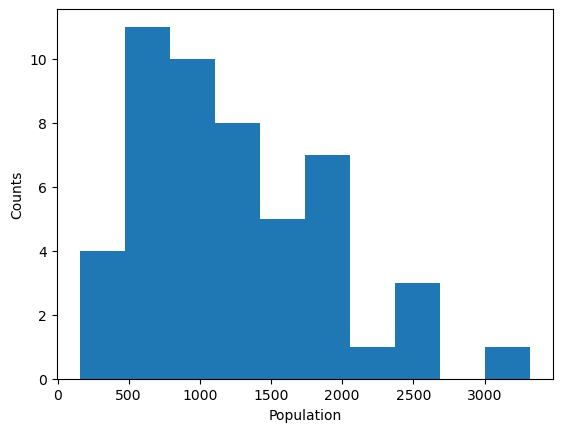

In [19]:
# Determine if the house age in California is normally distributed using a small and large sample size. 
#Small sample plot
sample_50 = california_data["Population"].sample(n=50, random_state=1)

plt.hist(sample_50)
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()

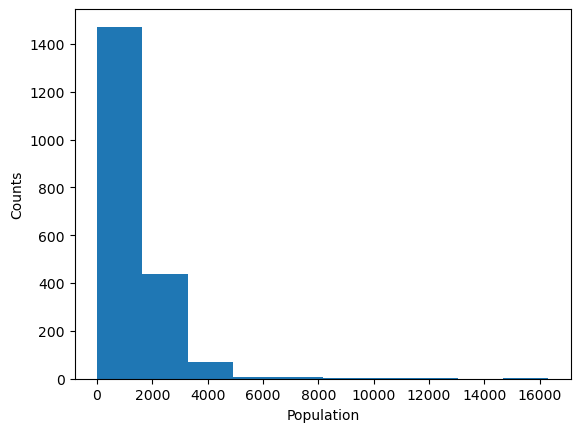

In [20]:
#Large sample plot
sample_2000 = california_data["Population"].sample(n=2000, random_state=1)

plt.hist(sample_2000)
plt.xlabel("Population")
plt.ylabel("Counts")
plt.show()

In [22]:
#Normal distribution tests
alpha = 0.05
sample_50_norm = st.normaltest(sample_50)
p_50 = sample_50_norm[1]
sample_2000_norm = st.normaltest(sample_2000)
p_2000 = sample_2000_norm[1]

if p_50 < alpha:
    print(f'The p-value of the small sample set is {p_50} and the null hypothesis can be rejected; the sample does not come from a normal distribution')
else:
    print(f'The p-value of the small sample set is {p_50} and the null hypothesis cannot be rejected; the sample does come from a normal distribution')

if p_2000 < alpha:
    print(f'The p-value of the large sample set is {p_2000} and the null hypothesis can be rejected; the sample does not come from a normal distribution')
else:
    print(f'The p-value of the large sample set is {p_2000} and the null hypothesis cannot be rejected; the sample does come from a normal distribution')

The p-value of the small sample set is 0.019429890685003854 and the null hypothesis can be rejected; the sample does not come from a normal distribution
The p-value of the large sample set is 0.0 and the null hypothesis can be rejected; the sample does not come from a normal distribution


In [32]:
# Determine if there are any potential outliers in the average occupancy in California
quartiles = np.percentile(california_data["AveOccup"], [25, 50, 75])
q1 = round(quartiles[0], 2)
q2 = round(quartiles[1], 2)
q3 = round(quartiles[2], 2)
iqr = round(q3-q1, 2)
lower_bound = round(q1-(1.5*iqr), 2)
upper_bound = round(q3+(1.5*iqr), 2)

print(f'The lower quartile of the temperatures is: {q1}.')
print(f'The upper quartile of the temperatures is: {q3}.')
print(f'The interquartile range of the temperatures is: {iqr}.')
print(f'The median of the temperatures is: {q2}.')
print(f'Values below {lower_bound} could be outliers.')
print(f'Values above {upper_bound} could be outliers.')

The lower quartile of the temperatures is: 2.43.
The upper quartile of the temperatures is: 3.3.
The interquartile range of the temperatures is: 0.87.
The median of the temperatures is: 2.82.
Values below 1.13 could be outliers.
Values above 4.6 could be outliers.


In [33]:
#Filter the dataframe to only the potential outliers.
outlier_df = california_data.loc[(california_data["AveOccup"] > upper_bound) | (california_data["AveOccup"] < lower_bound), :]
outlier_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14


In [34]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
min_medinc = outlier_df["MedInc"].min()
max_medinc = outlier_df["MedInc"].max()
print(f'The minimum median income of the potential outliers is {min_medinc}')
print(f'The maximum median income of the potential outliers is {max_medinc}')

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


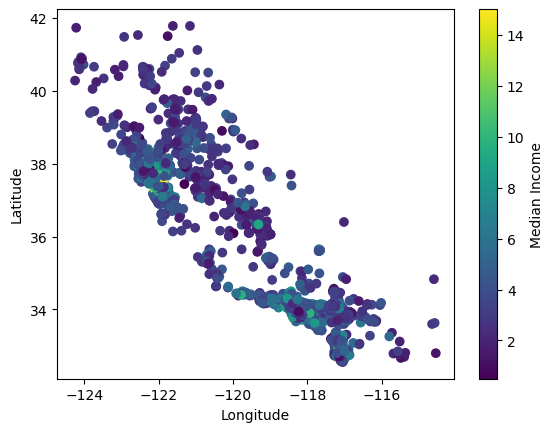

In [40]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
plt.scatter(california_data["Longitude"], california_data["Latitude"], c=california_data["MedInc"])
cbar = plt.colorbar()
plt.ylabel("Latitude")
plt.xlabel("Longitude")
cbar.set_label("Median Income")

#Save and display the plot
plt.savefig("Lat_Long_MedInc_Scatterplot.png")
plt.show()